In [42]:
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tf_pipeline import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


X is (1288, 50, 37), Y is (1288,)
7 different classes


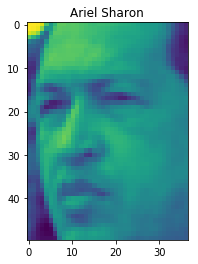

In [44]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X_origine, Y_origine = lfw_people.images, lfw_people.target
print(f'X is {X_origine.shape}, Y is {Y_origine.shape}')

C=len(np.unique(Y_origine))
print(f'{C} different classes')
index=0
plt.title(lfw_people.target_names[index]);plt.imshow(lfw_people.images[index]);plt.show()

In [45]:
X_flatten=X_origine.reshape(X_origine.shape[0],-1)
X_norm=X_flatten/255
X=X_norm.T

Y_hot=one_hot_encode(Y_origine,C)
Y=Y_hot.T
print(X.shape,Y.shape)

(1850, 1288) (7, 1288)


In [46]:
r=0.2
seed=42
np.random.seed(seed=seed)
perm=np.random.permutation(X.shape[0])
X_train, X_test = X[:,:int((1-r)*X.shape[1])],X[:,int((1-r)*X.shape[1]):]
Y_train, Y_test = Y[:,:int((1-r)*X.shape[1])],Y[:,int((1-r)*X.shape[1]):]


In [63]:
n_x=X_train.shape[0]
n_y=Y_train.shape[0]
arch=[(10,"reLu"),(20,"reLu"),(None,"softmax")]
tf.reset_default_graph()
parameters=initialize_parameters(arch,n_x,n_y)


X = tf.placeholder(tf.float32,shape=[n_x,None])
Y = tf.placeholder(tf.float32,shape=[n_y,None])
y_=forward_prop(X,parameters,arch)
with tf.Session() as sess:
    File_writer = tf.summary.FileWriter('log_simple_graph3',sess.graph)
    

o


In [149]:
parameters={}
parameters.update()

AttributeError: 'dict' object has no attribute 'up'

In [173]:
foo=list()
bar=foo
foo=2
print(id(foo))
print(id(bar))

1489264832
2187277127560


In [96]:
tf.reset_default_graph()

#setup
x = tf.constant(1.,name="input_value")
w = tf.Variable(0.8,name="weight")
y = tf.multiply(w , x,name="output_value")
y_ = tf.constant(0.0)
loss = (y - y_)**2
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)

#monitor
summary_y = tf.summary.scalar('output', y)


# monitor_operation()
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter('log_simple_graph',sess.graph)
    init = tf.initialize_all_variables()
    sess.run(init)
    for i in range(100):
        summary_str = sess.run(summary_y)
        summary_writer.add_summary(summary_str, i)
        sess.run(train_step)

In [ ]:
arch=[(5,"relu")]
param=model(X_train,X_test,Y_train,Y_test,arch)
Y_test

In [49]:
tf.multiply

AttributeError: module 'tensorflow' has no attribute 'mul'

In [10]:
import tensorflow as tf
tf.reset_default_graph()
node1=tf.constant(3.0,tf.float32)
node2=tf.constant(4.0,tf.float32)

print(node1,node2)
# node3=node1
# print(node3)

#Open a session : place the graph operation on devices (CPUs, GPUs) and provide method to execute them
# Need to close in order to free up the ressources used
with tf.Session() as sess:
    output=sess.run([node1,node2])
    print(output)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)
[3.0, 4.0]


In [13]:
import tensorflow as tf
tf.reset_default_graph()
a=tf.constant(5.0)
b=tf.constant(6.0)
c=a*b

with tf.Session() as sess:
    File_writer = tf.summary.FileWriter('log_simple_graph2',sess.graph)
    print(sess.run(c))

30.0


In [14]:
import tensorflow as tf
tf.reset_default_graph()

a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
adder_node=a+b

with tf.Session() as sess:
    print(sess.run(adder_node,{a:[1,3],b:[2,4]}))

[ 3.  7.]


In [21]:
import tensorflow as tf
#Model parameters
W=tf.Variable([.3],tf.float32)
b=tf.Variable( [-.3],tf.float32)

#Input outputs
x=tf.placeholder(tf.float32)

linear_model=W*x+b

y=tf.placeholder(tf.float32)


#Loss
square_delta=tf.square(linear_model-y)
loss=tf.reduce_sum(square_delta)

#Initialize
init=tf.global_variables_initializer()

#Optimizer
optim=tf.train.GradientDescentOptimizer(.001)
train=optim.minimize(loss)

#saver=tf.train.Saver() 

with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})
    print(sess.run([W,b]))
tf.nn.softmax

[array([-0.99998975], dtype=float32), array([ 0.99997061], dtype=float32)]
